In [1]:
import ee
import geemap
import os

In [2]:
geemap.show_youtube('_6JOA-iiEGU')

Output(layout=Layout(width='815px'))

In [3]:
Map = geemap.Map()
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

## Download an ee.Image

In [4]:
image = ee.Image('LE7_TOA_5YEAR/1999_2003')

landsat_vis = {
    'bands': ['B4', 'B3', 'B2'], 
    'gamma': 1.4
}
Map.addLayer(image, landsat_vis, "LE7_TOA_5YEAR/1999_2003", True, 0.7)

In [6]:
# Draw any shapes on the map using the Drawing tools before executing this code block
feature = Map.draw_last_feature
roi = feature.geometry()

In [7]:
out_dir = os.path.join(os.path.expanduser('~'), 'Downloads')
filename = os.path.join(out_dir, 'landsat.tif')

### Exporting all bands as one single image

In [8]:
image = image.clip(roi).unmask()
geemap.ee_export_image(image, filename=filename, scale=30, region=roi, file_per_band=False)

Generating URL ...
Please wait ...
Data downloaded to /home/jovyan/data/Downloads/landsat.tif


### Exporting each band as one image

In [9]:
geemap.ee_export_image(image, filename=filename, scale=30, region=roi, file_per_band=True)

Generating URL ...
Please wait ...
Data downloaded to /home/jovyan/data/Downloads


### Export an image to Google Drive

In [ ]:
geemap.ee_export_image_to_drive(image, description='landsat', folder='export', region=roi, scale=30)

## Download an ee.ImageCollection

In [10]:
import ee
import geemap
import os

In [11]:
loc = ee.Geometry.Point(-99.2222, 46.7816)
collection = ee.ImageCollection('USDA/NAIP/DOQQ') \
    .filterBounds(loc) \
    .filterDate('2008-01-01', '2020-01-01') \
    .filter(ee.Filter.listContains("system:band_names", "N"))

In [12]:
out_dir = os.path.join(os.path.expanduser('~'), 'Downloads')

In [13]:
print(collection.aggregate_array('system:index').getInfo())

['m_4609915_sw_14_1_20090818', 'm_4609915_sw_14_1_20100629', 'm_4609915_sw_14_1_20120714', 'm_4609915_sw_14_1_20140901', 'm_4609915_sw_14_1_20150926', 'm_4609915_sw_14_h_20170703']


In [14]:
geemap.ee_export_image_collection(collection, out_dir=out_dir)

Total number of images: 6

Exporting 1/6: m_4609915_sw_14_1_20090818.tif
Generating URL ...
Please wait ...
Data downloaded to /home/jovyan/data/Downloads/m_4609915_sw_14_1_20090818.tif


Exporting 2/6: m_4609915_sw_14_1_20100629.tif
Generating URL ...
Please wait ...
Data downloaded to /home/jovyan/data/Downloads/m_4609915_sw_14_1_20100629.tif


Exporting 3/6: m_4609915_sw_14_1_20120714.tif
Generating URL ...
Please wait ...
Data downloaded to /home/jovyan/data/Downloads/m_4609915_sw_14_1_20120714.tif


Exporting 4/6: m_4609915_sw_14_1_20140901.tif
Generating URL ...
Please wait ...
Data downloaded to /home/jovyan/data/Downloads/m_4609915_sw_14_1_20140901.tif


Exporting 5/6: m_4609915_sw_14_1_20150926.tif
Generating URL ...
Please wait ...
Data downloaded to /home/jovyan/data/Downloads/m_4609915_sw_14_1_20150926.tif


Exporting 6/6: m_4609915_sw_14_h_20170703.tif
Generating URL ...
Please wait ...
Data downloaded to /home/jovyan/data/Downloads/m_4609915_sw_14_h_20170703.tif




In [ ]:
geemap.ee_export_image_collection_to_drive(collection, folder='export', scale=10)

## Extract pixels as a Numpy array

In [15]:
import ee
import geemap
import numpy as np
import matplotlib.pyplot as plt

img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_038029_20180810') \
  .select(['B4', 'B5', 'B6'])

aoi = ee.Geometry.Polygon(
  [[[-110.8, 44.7],
    [-110.8, 44.6],
    [-110.6, 44.6],
    [-110.6, 44.7]]], None, False)

rgb_img = geemap.ee_to_numpy(img, region=aoi)
print(rgb_img.shape)

(373, 531, 3)


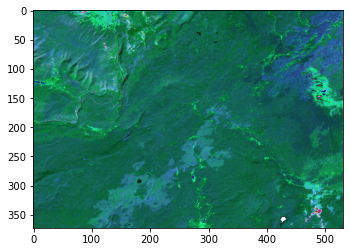

In [16]:
# Scale the data to [0, 255] to show as an RGB image. 
# Adapted from https://bit.ly/2XlmQY8. Credits to Justin Braaten
rgb_img_test = (255*((rgb_img[:, :, 0:3] - 100)/3500)).astype('uint8')
plt.imshow(rgb_img_test)
plt.show()